In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

In [7]:
df = pd.read_csv('cities_r2.csv')
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


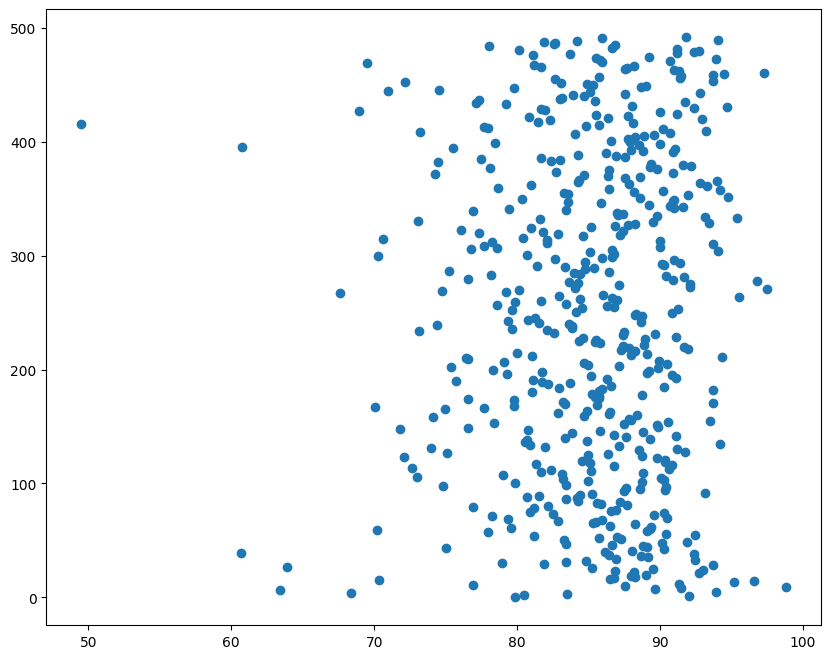

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(df['effective_literacy_rate_total'],df.index)
plt.show()

In [4]:
column_to_cluster = ['effective_literacy_rate_total']
selected_data = df[column_to_cluster]
sc = StandardScaler()
scaled_data = sc.fit_transform(selected_data)

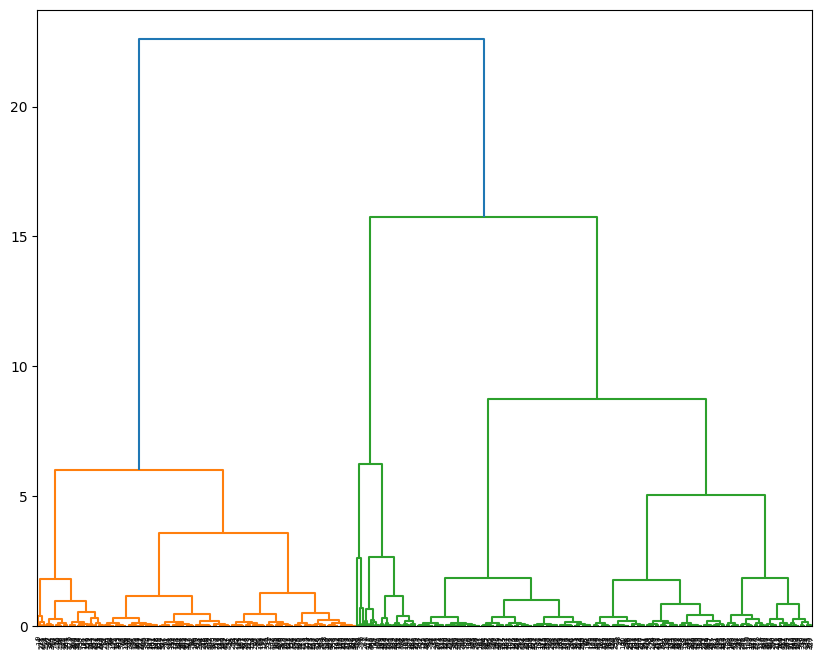

In [6]:
# draw dendro gram to get number of clusters

plt.figure(figsize=(10,8))
dend = shc.dendrogram(shc.linkage(scaled_data,method='ward'))

In [11]:
#number of cluster is 3
clustering_model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
clustering_model.fit(scaled_data)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [15]:
pred = clustering_model.fit_predict(scaled_data)
pred

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1,
       0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2,

In [14]:
df['Cluster'] = pred
df['Cluster'].value_counts()

Cluster
0    252
1    203
2     38
Name: count, dtype: int64

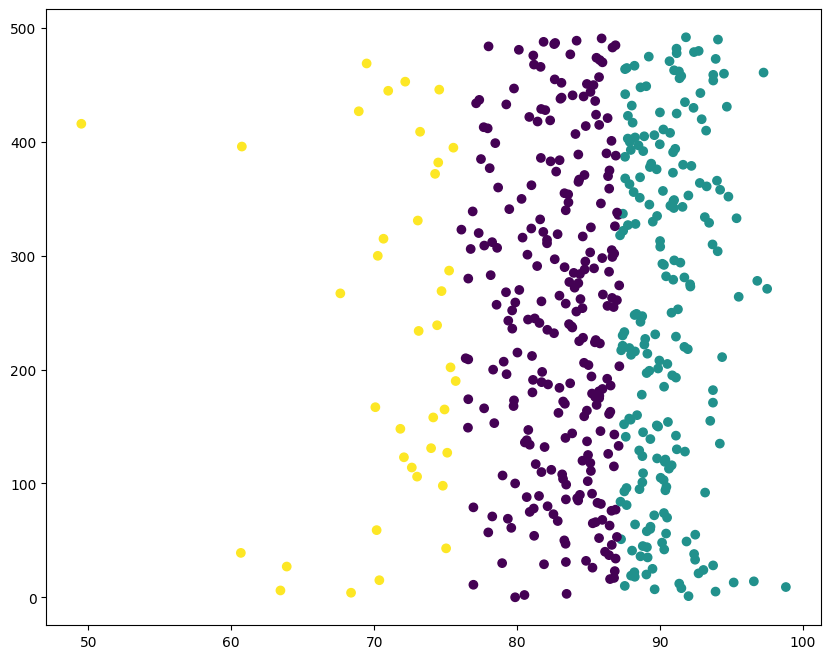

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(df['effective_literacy_rate_total'],df.index,c=df['Cluster'])
plt.show()